In [1]:
# #####################################################
# This is a demo for using chili-etc: CHILI Exposure Time Calculator              #
# #####################################################
# CHILI-ETC is used for setting the CHILI exposure time parameters. by YuLiang yuliang@shao.ac.cn . 
# This work is based on the work of the predecessors
# (by Lin Lin@SHAO: https://ifs-etc.readthedocs.io/en/latest/quickstart.html), 
# and has been modified and completed on the basis of it.

In [2]:
from chili_etc.sp.chili_config import build_default_calc
from chili_etc.sp.chili_perform_calculation import perform_calculation
import matplotlib.pyplot as plt

## Template name:
- strong emmision line model: SFgal_texp_FeH-2_tau10_Ew200.fits
- weak emmision line model: SFgal_texp_FeH0_tau5_Ew10.fits
- elliptical galaxy spectral type: SFgal_texp_FeH0_tau1_Ewd.fits
- AGN type 1: SFgal_texp_FeH0_tau5_Ew10_AGN1.fits

## Calculation mode:
- 'exptime2snr'
- 'snr2exptime'
- 'snr2limitmag'

## The output results:
- report.__dict__ lists all the information in the result
- report['snr'] contains the signal-to-noise ratio generated by the calculation
- report['readnoise], report['darknoise'], report['sourcenoise'] contain different types of noise.
- report['mockwave'], report['mockflux'], report['mockerror'] provide the mock spectrum of the observation

[0.15230929 0.15456777 0.15638247 ... 0.13976809 0.13948203 0.13937489]


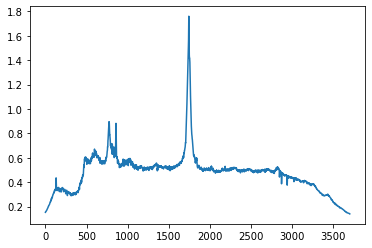

In [3]:
# to calcutlate the SNR
# input: exptime and other parameters
# output: SNR
chili_config = build_default_calc()
chili_config['obst'] = 300
chili_config['repn'] = 3
chili_config['source']['normalization']['value'] = 20.0
chili_config['source']['spectrum']['name'] = 'SFgal_texp_FeH0_tau5_Ew10_AGN1.fits'
report = perform_calculation(chili_config,calculation_mode='exptime2snr')
print(report.snr)

plt.plot(report.snr)

#report.__dict__

In [4]:
from astropy.io import fits
# Here, you may need to change the dir of the REFDATA in your one.
# Normally, you can find your pip package by import them in the python envirment. 
#>>> import chili_etc
#>>> chili_etc
# and then you will find your chili_etc package's loacation.
# if in linux system, your dir maybe:  /home/ly/miniconda3/lib/python3.9/site-packages/chile_etc/ refdata/sed/...
# if in windows system, your dir maybe: \C:\Users\DELL\Anaconda3\Lib\site-packages\chili_etc\refdata\sed/...
hdu = fits.open(r"../refdata/sed/SFgal_texp_FeH0_tau5_Ew10_AGN1.fits")
print(hdu[1].header)
imagn = hdu[1].data

XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   16 / length of dimension 1                          NAXIS2  =                 5564 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    4 / number of table fields                         TTYPE1  = 'WAVELENGTH'                                                          TFORM1  = 'E       '                                                            TUNIT1  = 'angstrom'                                                            TTYPE2  = 'FLUX    '                                                            TFORM2  = 'E       '                    

(5564,)


Text(0.5, 1.0, 'report.SNR')

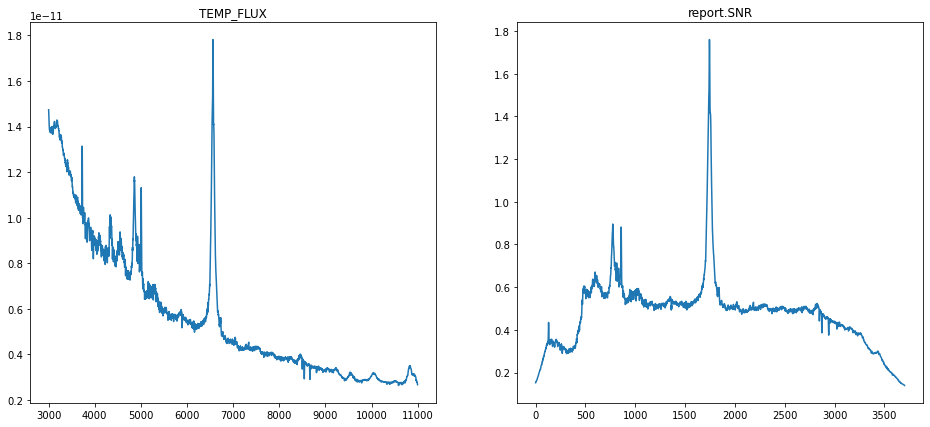

In [5]:
print(imagn.shape)
template_wave = hdu[1].data['wavelength']
template_flux = hdu[1].data['flux'] * 1e-12

import matplotlib.pyplot as plt
plt.figure(figsize=[16,7])
plt.subplot(121)
plt.plot(template_wave,template_flux)
plt.title('TEMP_FLUX')
plt.subplot(122)
plt.plot(report.snr)
plt.title('report.SNR')

In [6]:
# to calcutlate the exposure time
# input: SNR and other parameters
# output: exposure time

chili_config = build_default_calc()    #load the default model
#chili_config['obst'] = 300             #change special parameters you want
chili_config['repn'] = 3               #change special parameters you want
chili_config['source']['normalization']['value'] = 20.0    #change special parameters you want
chili_config['source']['spectrum']['name'] = 'SFgal_texp_FeH0_tau5_Ew10_AGN1.fits'  #change special parameters you want
report = perform_calculation(chili_config,calculation_mode='snr2exptime')
print('the expect exposure time is:',report.exptime)

#report.__dict__

the expect exposure time is: 323783.12182524084


In [7]:
exptime = report.exptime
print(exptime.shape)

()


In [8]:
report = perform_calculation(chili_config, calculation_mode='snr2exptime')
print(report.exptime)

323783.12182524084


[0.15230929 0.15456777 0.15638247 ... 0.13976809 0.13948203 0.13937489]


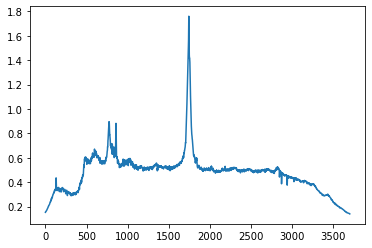

In [9]:
report = perform_calculation(chili_config, calculation_mode='exptime2snr')
print(report.snr)
plt.plot(report.snr)

In [10]:
report = perform_calculation(chili_config, calculation_mode='snr2limitmag')
print(report.limitmag)

16.358350199466365


In [11]:
config = build_default_calc()
config['targetsnr'] = 10
config['obst'] = 300
config['source']['normalization']['value'] = 18.0
config['source']['spectrum']['name'] = 'SFgal_texp_FeH0_tau1_Ewd.fits'
report = perform_calculation(config, calculation_mode='snr2exptime')
print(report.exptime)

6935.459285529389
